In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pyvisa import VisaIOError, ResourceManager

from pylabnet.hardware.oscilloscopes.tektronix_tds2004C import Driver


# Connect to Log Server

In [2]:
# Instantiate
logger = LogClient(
    host='192.168.1.2',
    port=9364,
    module_tag='Scope'
)

# Connect to Tetronix TDS 2004C

The scope is connected via USB to the PC. 

In [3]:
# List all connected VISA ressources 
rm = pyvisa.ResourceManager()
rm.list_resources()

('ASRL3::INSTR', 'GPIB0::18::INSTR', 'USB0::0x0699::0x03A2::C013186::0::INSTR')

In [4]:
# Choose ID corresponding to the scope
gpib_address = 'USB0::0x0699::0x03A2::C013186::INSTR'

In [6]:
scope = Driver(
    gpib_address=gpib_address,
    logger=logger
)

In [8]:
# Find out which trigger source is set.
scope.get_trigger_source()

'CH1'

In [9]:
# Set trigger source to CH4
scope.set_trigger_source('CH4')
scope.get_trigger_source()

'CH4'

In [10]:
# Now let's check the timing scale
timing_scale = scope.get_timing_scale()
timing_scale

0.0005

In [11]:
# Let's decrease it by a factor of 1000
scope.set_timing_scale(timing_scale/1000)
scope.get_timing_scale()

5e-07

In [12]:
# Setup scope in single shot mode
scope.set_single_run_acq()

In [13]:
# Run one acquisition
scope.acquire_single_run()

In [23]:
# Read out trace
trace, ts = scope.read_out_trace('CH4')

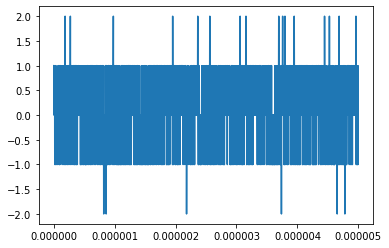

In [24]:
plt.plot(ts, trace)